Three 1-D Gaussian for the red buoy


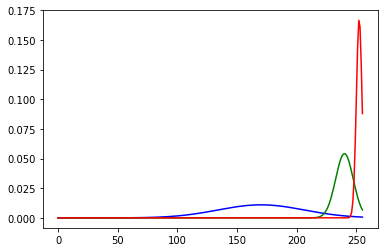

Three 1-D Gaussian for the green buoy


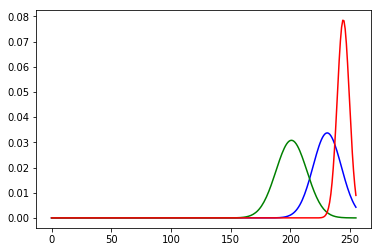

Two 1-D Gaussian for the yellow buoy


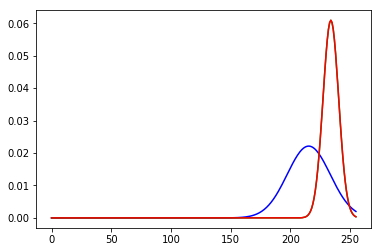

In [7]:
# #######################Project3_GMM_Fitting################################
# Team Members (Group Name - Sayan + Nikhil + Pranali)
# PRANALI DESAI - 116182935
# NIKHIL MEHRA - 116189941
# SAYAN BRAHMA - 116309165
##############################################################################

import cv2
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
import math
import copy
import scipy.stats as stats

##############################################################################
# Function Name - gaussian
# Arguments - x(numpy array of the x-coordinates for the Gaussian)
# mu(mean of the Gaussian), sig(standard deviation of the Gaussian)
# Return - y-coordinates of the Gaussian(numpy array)
# Algorithm - Calculates y-coordinates of the Gaussian using the corresponding
# x-coordinates and the Gaussian equation.
##############################################################################

def gaussian(x, mu, sig):
    return ((1/(sig*math.sqrt(2*math.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))

x=list(range(0, 256)) # x-coordinate of all the Gaussian 
# Trained parameters for three Gaussian for the orange buoy
red_parameters = [np.array([170.1123]), np.array([36.1331436]), np.array([239.95395]), np.array([7.3541856]), np.array([252.3011604]), np.array([2.373163])]
# Trained parameters for three Gaussian for the green buoy
green_parameters = [np.array([230.92855834531522]), np.array([11.825125082753653]), np.array([200.98927408174694]), np.array([12.952317147474373]), np.array([244.4299727613101]), np.array([5.067551652277579])]
# Trained parameters for three Gaussian for the yellow buoy
yellow_parameters = [np.array([215.4510933088003]), np.array([18.0247770404578]), np.array([234.0041244762171]), np.array([6.54973545834207]), np.array([234.00530400106925]), np.array([6.5486748652304865])]

redGaussian1 = gaussian(x, red_parameters[0], red_parameters[1]) # 1st 1-D Gaussian in the red channel for the orange buoy
redGaussian2 = gaussian(x, red_parameters[2], red_parameters[3]) # 2nd 1-D Gaussian in the red channel for the orange buoy
redGaussian3 = gaussian(x, red_parameters[4], red_parameters[5]) # 3rd 1-D Gaussian in the red channel for the orange buoy

greenGaussian1 = gaussian(x, green_parameters[0], green_parameters[1]) # 1st 1-D Gaussian in the green channel for the green buoy
greenGaussian2 = gaussian(x, green_parameters[2], green_parameters[3]) # 2nd 1-D Gaussian in the green channel for the green buoy
greenGaussian3 = gaussian(x, green_parameters[4], green_parameters[5]) # 3rd 1-D Gaussian in the green channel for the green buoy

yellowGaussian1 = gaussian(x, yellow_parameters[0], yellow_parameters[1]) # 1st 1-D Gaussian in the (green+red)/2 channel for the yellow buoy
yellowGaussian2 = gaussian(x, yellow_parameters[2], yellow_parameters[3]) # 2nd 1-D Gaussian in the (green+red)/2 channel for the yellow buoy
yellowGaussian3 = gaussian(x, yellow_parameters[4], yellow_parameters[5]) # 3rd 1-D Gaussian in the (green+red)/2 channel for the yellow buoy

print('Three 1-D Gaussian for the red buoy')
plt.plot(redGaussian1, 'b') # Plotting 1st 1-D Gaussian in the red channel for the orange buoy with blue color
plt.plot(redGaussian2, 'g') # Plotting 2nd 1-D Gaussian in the red channel for the orange buoy with green color
plt.plot(redGaussian3, 'r') # Plotting 3rd 1-D Gaussian in the red channel for the orange buoy with red color
plt.show()

print('Three 1-D Gaussian for the green buoy')
plt.plot(greenGaussian1, 'b') # Plotting 1st 1-D Gaussian in the green channel for the green buoy with blue color
plt.plot(greenGaussian2, 'g') # Plotting 2nd 1-D Gaussian in the green channel for the green buoy with green color
plt.plot(greenGaussian3, 'r') # Plotting 3rd 1-D Gaussian in the green channel for the green buoy with red color
plt.show()

print('Two 1-D Gaussian for the yellow buoy')
plt.plot(yellowGaussian1, 'b') # Plotting 1st 1-D Gaussian in the (green+red)/2 channel for the yellow buoy with blue color
plt.plot(yellowGaussian2, 'g') # Plotting 2nd 1-D Gaussian in the (green+red)/2 channel for the yellow buoy with green color
plt.plot(yellowGaussian3, 'r') # Plotting 3rd 1-D Gaussian in the (green+red)/2 channel for the yellow buoy with red color
plt.show()

cap = cv2.VideoCapture("detectbuoy.avi") # Input Video
#capout = cv2.VideoWriter('./GMMfitting.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (640,480)) # Output video

while (True): # Looping over the frames of the input video
    
    ret, image = cap.read() 
        
    if not ret: # If no frame is generated or the video has ended
        cv2.destroyAllWindows() # Destroy all Windows
        cap.release() # Releases software/hardware resource
        #capout.release() # Releases video writing resource
        break
        
    image_r = image[:,:,2] # Red channel of the frame
    image_g = image[:,:,1] # Green channel of the frame
    image_b = image[:,:,0] # Blue channel of the frame
    
    img_out_r = np.zeros(image_r.shape, dtype = np.uint8) # Temporary frame for orange buoy
    img_out_g = np.zeros(image_r.shape, dtype = np.uint8) # Temporary frame for green buoy 
    img_out_y = np.zeros(image_r.shape, dtype = np.uint8) # Temporary frame for yellow buoy
        
    for i in range(0,image_r.shape[0]): # Looping over the length of the frame
        for j in range(0,image_r.shape[1]): # Looping over the width of the frame
            
            # Probabilities for orange buoy
            if redGaussian3[image_r[i][j]] > 0.15 and image_b[i][j] < 160: 
                img_out_r[i][j] = 255
                    
            if redGaussian2[image_r[i][j]] > 0.02 and image_b[i][j] < 160:
                img_out_r[i][j] = 0
                
            if redGaussian1[image_r[i][j]] > 0.001 and image_b[i][j] < 160:
                img_out_r[i][j] = 0
            
            # Probabilities for green buoy
            if image_r[i][j] < 200:
                if greenGaussian3[image_g[i][j]] > 0.06 and greenGaussian2[image_g[i][j]] < 0.02 and greenGaussian1[image_g[i][j]] < 0.02:     
                    img_out_g[i][j]=255
                else:
                    img_out_g[i][j]=0
                    
            # Probabilities for yellow buoy
            if ((yellowGaussian3[image_r[i][j]] + yellowGaussian3[image_g[i][j]])/2) > 0.03  and ((yellowGaussian1[image_r[i][j]] + yellowGaussian1[image_g[i][j]])/2) < 0.015:
                img_out_y[i][j]=255
            else:
                img_out_y[i][j]=0
            
    # Morphological and Contouring Operations on the orange buoy
    ret, threshold = cv2.threshold(img_out_r, 240, 255, cv2.THRESH_BINARY) 
    kernel = np.ones((2,2),np.uint8) # Kernel for dilation
    dilation = cv2.dilate(threshold,kernel,iterations = 6)
    _, contours, _= cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if cv2.contourArea(contour) > 20:
            (x,y),radius = cv2.minEnclosingCircle(contour)
            center = (int(x)-3,int(y)-4)
            radius = int(radius)
            if radius > 13:
                cv2.circle(image,center,radius,(0,0,255),2)
    
    # Morphological and Contouring Operations on the green buoy
    ret, threshold = cv2.threshold(img_out_g, 240, 255, cv2.THRESH_BINARY)
    kernel = np.ones((2,2),np.uint8) # Kernel for dilation
    dilation = cv2.dilate(threshold,kernel,iterations =9)
    _,contours, _= cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if cv2.contourArea(contour) >  30:
            (x,y),radius = cv2.minEnclosingCircle(contour)
            center = (int(x)-5,int(y))
            radius = int(radius)
            if radius > 13 and radius < 15.5:
                cv2.circle(image,center,radius,(0,255,0),2)
                break
          
    # Morphological and Contouring Operations on the yellow buoy
    ret, threshold = cv2.threshold(img_out_y, 240, 255, cv2.THRESH_BINARY)
    kernel1 = np.ones((2,2),np.uint8) # Kernel for Erosion
    erosion = cv2.erode(threshold,kernel1,iterations = 1)
    kernel2 = np.ones((50,50),np.uint8) # Kernel for closing
    closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel2)
    erosion = cv2.erode(closing,kernel1,iterations = 5)
    _,contours, _= cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if cv2.contourArea(contour) <  3000 and cv2.contourArea(contour) >  100:
            (x,y),radius = cv2.minEnclosingCircle(contour)
            center = (int(x),int(y))
            radius = int(radius)
            if center[1] < 400 and center[1] > 100 and radius > 8:
                cv2.circle(image,center,radius,(0,255,255),2)
                break
                
    cv2.imshow('GMM_Fitting', image)
    #capout.write(image)
    if cv2.waitKey(1) == 27: # Press 'ESC' to stop the processing and break out of the loop 
        cv2.destroyAllWindows() # Destroys all window after pressing 'ESC'
        #capout.release()
        cap.release() # Releases software/hardware resource 